# Regresión líneal: Costo de un incidente de seguridad

En este ejercicio s explican los fundaments básicos de la regresión líneal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

# 1.- Generación del DataSet

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos (DataSet) es: ", len(X))

La longitud del conjunto de datos (DataSet) es:  100


# 2.-Visualización del conjunto de datos (DataSet9

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

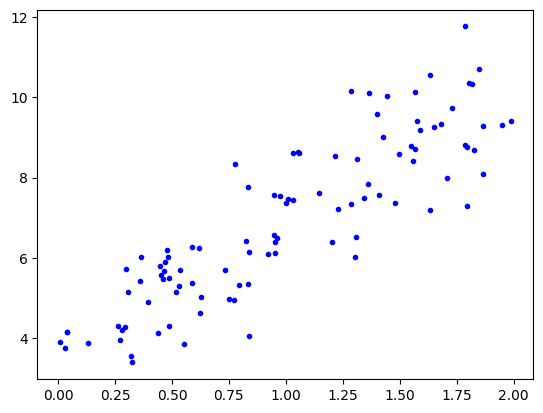

In [3]:
plt.plot(X, y, "b.")
plt.show()

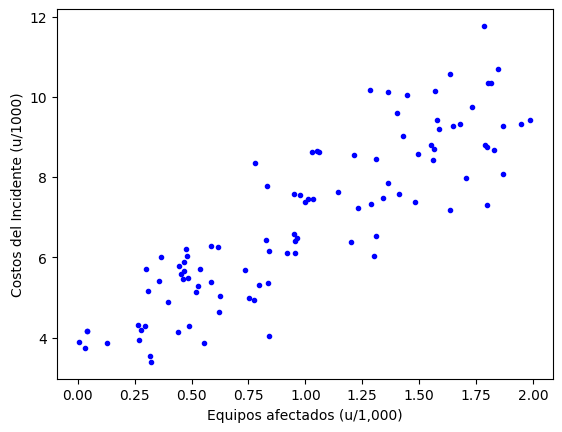

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costos del Incidente (u/1000)")
plt.show()

# 3.- Modificación del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_afectados,Costo
0,0.307481,5.151300
1,1.052844,8.640440
2,0.530046,5.287748
3,0.030996,3.745631
4,1.865877,8.086073
5,0.952978,6.399024
6,0.518488,5.136889
7,1.558347,8.412557
8,0.840419,4.041398
9,0.831650,7.771742


In [7]:
# Escalado del número de equipos afectados 
df['No_Equipos_afectados'] = df['No_Equipos_afectados'] * 1000
df['No_Equipos_afectados'] = df['No_Equipos_afectados'].astype('int')
# Escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_afectados,Costo
0,307,51512
1,1052,86404
2,530,52877
3,30,37456
4,1865,80860
5,952,63990
6,518,51368
7,1558,84125
8,840,40413
9,831,77717


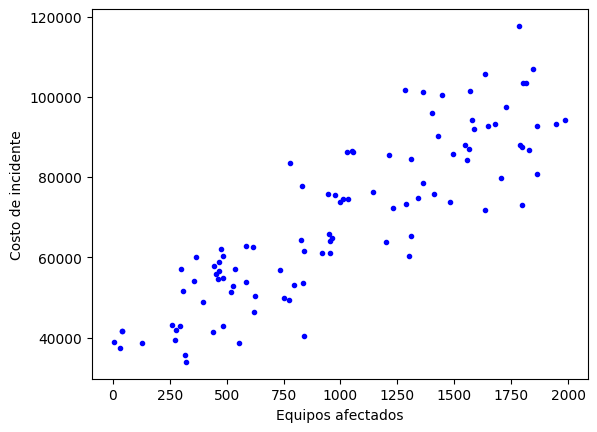

In [8]:
plt.plot(df['No_Equipos_afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo de incidente")
plt.show()

# 4.- Construcción del modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#Construcción del modelo y ajuste de la funcion de hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_afectados'].values.reshape(-1, 1),df['Costo'].values)

LinearRegression()

In [11]:
# Parámetro Tetha 0 
lin_reg.intercept_


np.float64(37159.69987513524)

In [12]:
# Parámetro Tetha 1
lin_reg.coef_

array([32.26345658])

In [13]:
# Predicción para el valor minimo y maximo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df['No_Equipos_afectados'].min()],[df["No_Equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

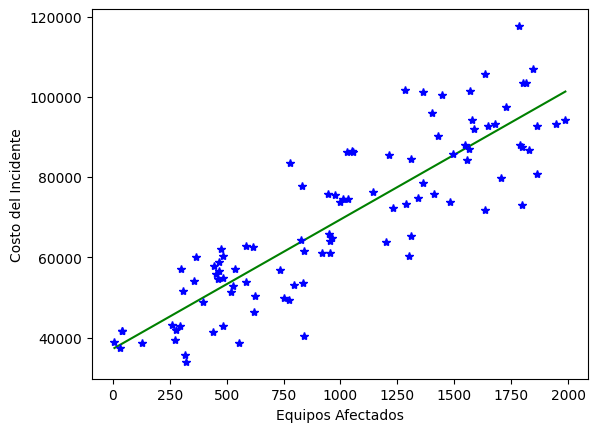

In [20]:
# Representación gráfica de la función de hipótesis generada.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_afectados'], df['Costo'], "b*")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 5.- Predicción de nuevos ejemplos 

In [24]:
x_new = np.array([[2700]]) # Número de equipos afectados.
# Predicción del costo que tendria el incidente.
Costo = lin_reg.predict(x_new)
print("El costo del inicidente sería: $ ", int(Costo[0]))

El costo del inicidente sería: $  124271


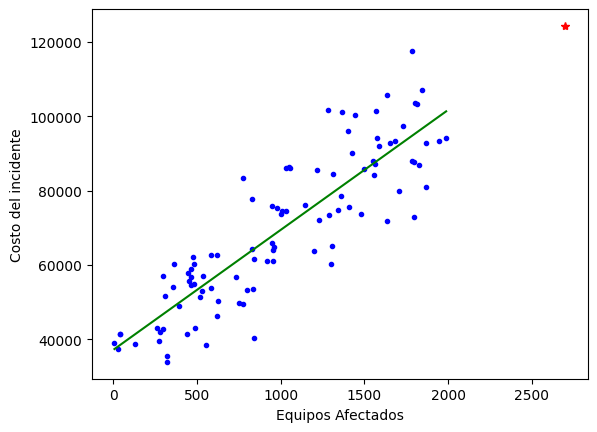

In [25]:
plt.plot(df['No_Equipos_afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "r*")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()